In [ ]:
import timeit
import jax
import matplotlib.pyplot as plt
import numpy as np
import gc
from qsc.calculate_r3 import calc_r3_new
from qsc import Qsc

# --- Load QSC object ---
stel = Qsc(rc=[1, 0.09], zs=[0, -0.09], nfp=2, etabar=0.95, I2=0.9, order='r2', B2c=-0.7, p2=-600000.)

# --- Setup JIT ---
jited_function = jax.jit(calc_r3_new)

# Warm-up to compile
jited_function(
    stel.B0, stel.G0, stel.X20, stel.Y1c, stel.X2c, stel.X2s, stel.etabar * stel.B0,
    stel.X1c, stel.X1s, stel.Y1s, stel.I2, stel.iotaN, stel.B20, stel.Y20, stel.Y2c,
    stel.Y2s, stel.Z20, stel.abs_G0_over_B0, stel.Z2c, stel.Z2s, stel.torsion,
    stel.d_X1c_d_varphi, stel.d_Y1c_d_varphi, stel.d_d_varphi, stel.spsi, stel.p2,
    stel.curvature, stel.d_Z20_d_varphi, stel.sG, stel.G2, stel.N_helicity,
    stel.helicity, stel.nfp, stel.varphi
)

# --- Define lambdas for timing ---
jax_lambda = lambda: jited_function(
    stel.B0, stel.G0, stel.X20, stel.Y1c, stel.X2c, stel.X2s, stel.etabar * stel.B0,
    stel.X1c, stel.X1s, stel.Y1s, stel.I2, stel.iotaN, stel.B20, stel.Y20, stel.Y2c,
    stel.Y2s, stel.Z20, stel.abs_G0_over_B0, stel.Z2c, stel.Z2s, stel.torsion,
    stel.d_X1c_d_varphi, stel.d_Y1c_d_varphi, stel.d_d_varphi, stel.spsi, stel.p2,
    stel.curvature, stel.d_Z20_d_varphi, stel.sG, stel.G2, stel.N_helicity,
    stel.helicity, stel.nfp, stel.varphi
)

# --- Benchmark ---
n_runs = 50
jax_times = [timeit.timeit(jax_lambda, number=1) for _ in range(n_runs)]
jax_avg = np.mean(jax_times)


nfourier: 2
before helicity
after helicity
spectral diff matrix
after spectral diff matrix
before fourier min
after fourier min
before spline
after spline

Init axis completed...

Sigma equation solved...

Calculating R1...
factor 0.9841224002470026
tn [1.18803769 1.18777624 1.18697879 1.18560608 1.18359298 1.18084901
 1.17725911 1.17268491 1.16696642 1.15992447 1.15136406 1.14107866
 1.12885598 1.11448513 1.09776569 1.07851875 1.05660019 1.03191645
 1.00444293 0.97424506 0.94150214 0.90653365 0.86982744 0.8320683
 0.79416369 0.75726037 0.72274063 0.69218101 0.66725203 0.64954433
 0.64033242 0.64033242 0.64954433 0.66725203 0.69218101 0.72274063
 0.75726037 0.79416369 0.8320683  0.86982744 0.90653365 0.94150214
 0.97424506 1.00444293 1.03191645 1.05660019 1.07851875 1.09776569
 1.11448513 1.12885598 1.14107866 1.15136406 1.15992447 1.16696642
 1.17268491 1.17725911 1.18084901 1.18359298 1.18560608 1.18697879
 1.18777624]
nt [1.18803769 1.18777624 1.18697879 1.18560608 1.18359298 1.1808

In [ ]:
gc.disable()

# --- Benchmark ---
n_runs = 50
jax_times = [timeit.timeit(jax_lambda, number=1) for _ in range(n_runs)]
jax_avg = np.mean(jax_times)


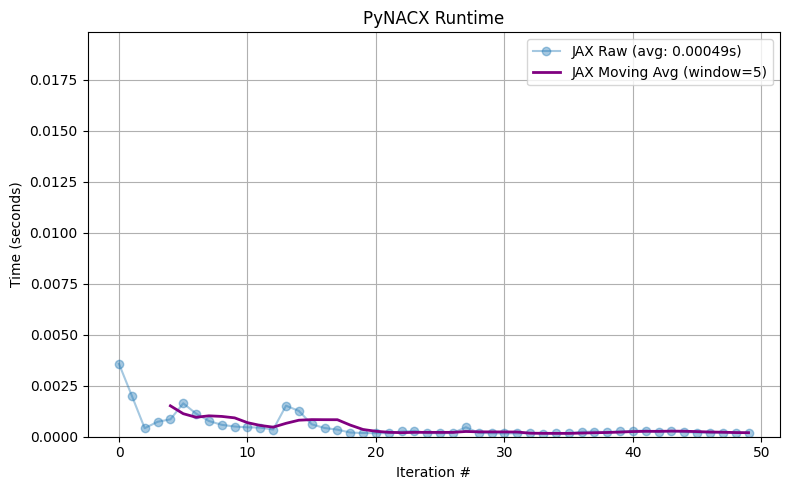

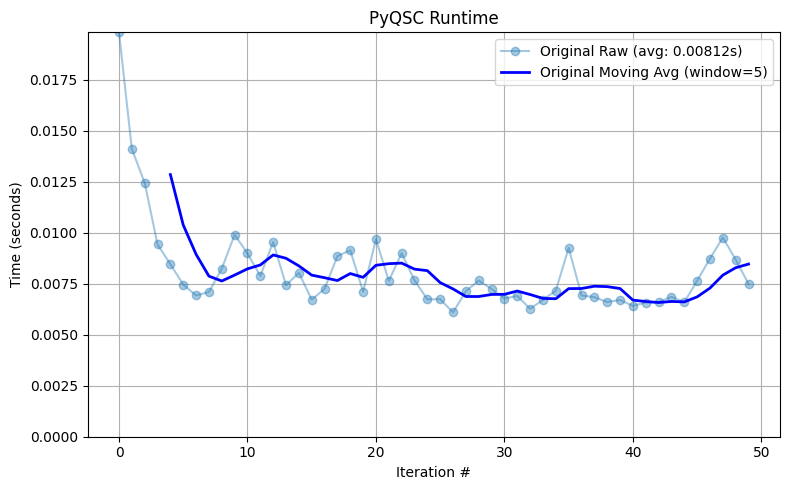

Average PyNACX time over 20 runs: 0.00049 seconds
Average PyQSC time over 20 runs: 0.00812 seconds
Speedup: 16.53x faster with JAX


In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Load the timing data from the files
original_times = np.loadtxt('original_times.txt')

# --- Moving Average Function ---
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# --- Calculate Moving Averages ---
jax_moving_avg = moving_average(jax_times, window_size=5)
original_moving_avg = moving_average(original_times, window_size=5)

# --- Determine Shared Y-axis Limits ---
min_time = min(np.min(jax_times), np.min(original_times), 0)
max_time = max(np.max(jax_times), np.max(original_times), 1.5 * max(np.mean(jax_times), np.mean(original_times)))

jax_avg = np.mean(jax_times)
original_avg = np.mean(original_times)

# --- Plot JAX Data ---
plt.figure(figsize=(8, 5))
plt.plot(jax_times, label=f"JAX Raw (avg: {jax_avg:.5f}s)", marker='o', alpha=0.4)
plt.plot(range(4, len(jax_times)), jax_moving_avg, label="JAX Moving Avg (window=5)", color='purple', linewidth=2)
plt.ylim(min_time, max_time)
plt.xlabel("Iteration #")
plt.ylabel("Time (seconds)")
plt.title("PyNACX Runtime")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot Original Data ---
plt.figure(figsize=(8, 5))
plt.plot(original_times, label=f"Original Raw (avg: {original_avg:.5f}s)", marker='o', alpha=0.4)
plt.plot(range(4, len(original_times)), original_moving_avg, label="Original Moving Avg (window=5)", color='blue', linewidth=2)
plt.ylim(min_time, max_time)
plt.xlabel("Iteration #")
plt.ylabel("Time (seconds)")
plt.title("PyQSC Runtime")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Print Results ---

print(f"Average PyNACX time over 20 runs: {jax_avg:.5f} seconds")
print(f"Average PyQSC time over 20 runs: {original_avg:.5f} seconds")
print(f"Speedup: {original_avg / jax_avg:.2f}x faster with JAX")


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(jax_times, label="JAX JIT", marker='o')
# plt.plot(original_times, label="Original", marker='x')  # if you have original

plt.title("Runtime per Execution")
plt.xlabel("Run #")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
timeit.timeit(lambda: jited_funtion(stel.B0, stel.G0, stel.X20, stel.Y1c, stel.X2c, stel.X2s, stel.etabar*stel.B0, stel.X1c, stel.X1s, stel.Y1s, stel.I2, stel.iotaN, stel.B20, stel.Y20, stel.Y2c, stel.Y2s, stel.Z20, stel.abs_G0_over_B0, stel.Z2c, stel.Z2s, stel.torsion, stel.d_X1c_d_varphi, stel.d_Y1c_d_varphi, stel.d_d_varphi, stel.spsi, stel.p2, stel.curvature, stel.d_Z20_d_varphi, stel.sG, stel.G2, stel.N_helicity, stel.helicity, stel.nfp, stel.varphi), number=3)

In [ ]:
import numpy as np

iterations = 10**(np.arange(6))
results = np.zeros((3, len(iterations)))

for i, num in enumerate(iterations):
    results[0][i] = timeit.timeit(lambda: r1_diagnostics(stel.nfp, stel.etabar, stel.sG, stel.spsi, stel.curvature, stel.sigma, stel.helicity, stel.varphi, stel.X1s, stel.X1c, stel.d_l_d_phi, stel.d_d_varphi, stel.B0, stel.d_l_d_varphi, stel.tangent_cylindrical, stel.normal_cylindrical, stel.binormal_cylindrical, stel.iotaN, stel.torsion), number=num)
    results[1][i] = timeit.timeit(lambda: calc_r3_new(stel.B0, stel.G0, stel.X20, stel.Y1c, stel.X2c, stel.X2s, stel.etabar*stel.B0, stel.X1c, stel.X1s, stel.Y1s, stel.I2, stel.iotaN, stel.B20, stel.Y20, stel.Y2c, stel.Y2s, stel.Z20, stel.abs_G0_over_B0, stel.Z2c, stel.Z2s, stel.torsion, stel.d_X1c_d_varphi, stel.d_Y1c_d_varphi, stel.d_d_varphi, stel.spsi, stel.p2, stel.curvature, stel.d_Z20_d_varphi, stel.sG, stel.G2, stel.N_helicity, stel.helicity, stel.nfp, stel.varphi), number=num)
    


In [1]:
from qsc.calculate_r1 import new_solve_sigma_equation
import jax
from qsc import Qsc


stel = Qsc(rc=[1, 0.09], zs=[0, -0.09], nfp=2, etabar=0.95, I2=0.9, order='r2', B2c=-0.7, p2=-600000.)

nphi = 61
sigma0 = 0
helicity = stel.helicity
nfp = 1
d_d_varphi = stel.d_d_varphi
etabar_squared_over_curvature_squared = stel.etabar_squared_over_curvature_squared
spsi = 1
torsion = stel.torsion
G0 = stel.G0



nfourier: 2
before helicity
after helicity
spectral diff matrix
after spectral diff matrix
before fourier min
after fourier min
before spline
after spline

Init axis completed...


TracerIntegerConversionError: The __index__() method was called on traced array with shape int64[]
The error occurred while tracing the function new_new_newton at /Users/z/Documents/GitHub/pyNACX/qsc/newton.py:69 for jit. This value became a tracer due to JAX operations on these lines:

  operation a:f64[] = convert_element_type[new_dtype=float64 weak_type=True] b
    from line /Users/z/Documents/GitHub/pyNACX/qsc/calculate_r1.py:89:16 (new_solve_sigma_equation.<locals>._residual)

  operation a:i32[] = convert_element_type[new_dtype=int32 weak_type=False] b
    from line /Users/z/Documents/GitHub/pyNACX/qsc/calculate_r1.py:89:16 (new_solve_sigma_equation.<locals>._residual)

  operation a:f64[61] = dot_general[
  dimension_numbers=(([1], [0]), ([], []))
  preferred_element_type=float64
] b c
    from line /Users/z/Documents/GitHub/pyNACX/qsc/calculate_r1.py:93:12 (new_solve_sigma_equation.<locals>._residual)

  operation a:f64[] = convert_element_type[new_dtype=float64 weak_type=False] b
    from line /Users/z/Documents/GitHub/pyNACX/qsc/calculate_r1.py:94:22 (new_solve_sigma_equation.<locals>._residual)

  operation a:f64[] = mul b c
    from line /Users/z/Documents/GitHub/pyNACX/qsc/calculate_r1.py:94:22 (new_solve_sigma_equation.<locals>._residual)

(Additional originating lines are not shown.)
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerIntegerConversionError

In [11]:
import numpy as np
#jitted_sigma = jax.jit(new_solve_sigma_equation, static_argnames=["nphi", "sigma0", "helicity", "nfp", "etabar_squared_over_curvature_squared", "spsi", "torsion", "G0"])


nphi = 61
sigma0 = 0.

def loss(I2, B0):
  iota = new_solve_sigma_equation(nphi, sigma0, helicity, nfp, d_d_varphi, etabar_squared_over_curvature_squared, spsi, torsion, I2, B0, G0)[1] 
  return (iota-0.85)**2

I2 = np.linspace(-1.5, 1.5, 10)
B0 = np.linspace(-1.5, 1.5, 10)
loss_array = np.zeros((len(I2), len(B0)))

for i in range(len(I2)):
  print(i)
  for j in range(len(B0)):
    loss_array[i, j] = loss(I2[i], B0[j])

0


KeyboardInterrupt: 